# Risk Models: Value at Risk (VaR) and Expected Shortfall (ES)

In this notebook, we will calculate **Value at Risk (VaR)** and **Expected Shortfall (ES)**  
for a financial asset using Python.

VaR tells us the **maximum expected loss** over a certain time horizon at a given confidence level.  
Expected Shortfall measures the **average loss beyond the VaR threshold**, giving a more complete picture of risk.

We will use three methods for VaR:  
1. Parametric (assumes normal returns)  
2. Historical (uses actual past returns)  
3. Monte Carlo simulation (simulates many possible scenarios)


In [11]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Plot settings
sns.set(style="whitegrid")
%matplotlib inline


# Download Historical Data

We will download historical prices for the S&P 500 index (^GSPC) from Yahoo Finance.  
We will use **adjusted closing prices** to account for dividends and splits.  

Then we calculate **daily returns** as percentage changes.


In [17]:
# Download historical data with auto_adjust
ticker = "^GSPC"
data = yf.download(ticker, start="2015-01-01", end="2025-01-01", auto_adjust=True)

# Make sure 'Close' is a Series
if isinstance(data, pd.DataFrame):
    prices = data['Close']  # this is a Series
else:
    prices = data

# Daily returns as a Series
returns = prices.pct_change().dropna()

print(type(returns))  # should be pandas Series
returns.head()


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>


Ticker,^GSPC
Date,
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888
2015-01-09,-0.008404


# Value at Risk (VaR)

VaR tells us the **maximum expected loss** over a given time period at a certain confidence level.  

We calculate VaR in three ways:
1. Parametric: assumes returns follow a normal distribution.
2. Historical: uses actual past returns.
3. Monte Carlo: simulates many possible future returns.

We will use a **95% confidence level**, meaning there is a 5% chance of exceeding the VaR.


In [19]:
confidence_level = 0.95

# Parametric VaR
mu = returns.mean()
sigma = returns.std()
VaR_param = mu - sigma * 1.645
print("Parametric VaR (95%):", VaR_param)

# Historical VaR
VaR_hist = returns.quantile(1 - confidence_level)
print("Historical VaR (95%):", VaR_hist)

# Monte Carlo VaR
simulated_returns = np.random.normal(mu, sigma, 100000)
VaR_mc = np.percentile(simulated_returns, (1 - confidence_level) * 100)
print("Monte Carlo VaR (95%):", VaR_mc)


Parametric VaR (95%): Ticker
^GSPC   -0.017993
dtype: float64
Historical VaR (95%): Ticker
^GSPC   -0.016903
Name: 0.050000000000000044, dtype: float64
Monte Carlo VaR (95%): -0.018023998729798908


# Expected Shortfall (ES)

Expected Shortfall (also called Conditional VaR) is the **average loss beyond the VaR threshold**.  
It gives a better sense of tail risk, because it accounts for the magnitude of extreme losses.

We will calculate ES for both Historical and Parametric VaR.


In [20]:
from scipy.stats import norm

# Historical ES
ES_hist = returns[returns <= VaR_hist].mean()
print("Historical Expected Shortfall (95%):", ES_hist)

# Parametric ES
ES_param = mu - sigma * norm.pdf(norm.ppf(confidence_level)) / (1 - confidence_level)
print("Parametric Expected Shortfall (95%):", ES_param)


Historical Expected Shortfall (95%): Ticker
^GSPC   -0.027373
dtype: float64
Parametric Expected Shortfall (95%): Ticker
^GSPC   -0.022684
dtype: float64


# Visualizing VaR and ES

Let's plot the daily returns histogram and show where the VaR and ES lie.  
This helps to **see the tail risk** visually.


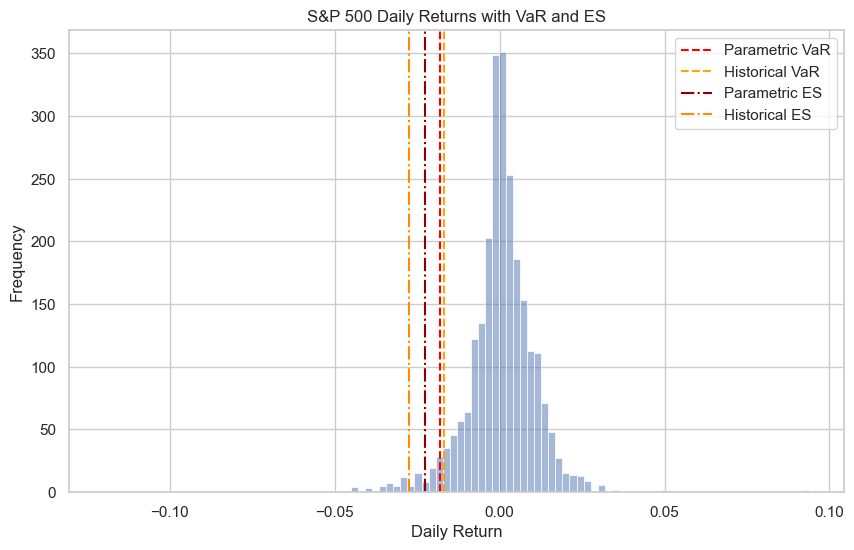

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(returns, bins=100, kde=False, color='skyblue')

plt.axvline(float(VaR_param.iloc[0]), color='red', linestyle='--', label='Parametric VaR')
plt.axvline(float(VaR_hist.iloc[0]), color='orange', linestyle='--', label='Historical VaR')
plt.axvline(float(ES_param.iloc[0]), color='darkred', linestyle='-.', label='Parametric ES')
plt.axvline(float(ES_hist.iloc[0]), color='darkorange', linestyle='-.', label='Historical ES')

plt.title("S&P 500 Daily Returns with VaR and ES")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()
